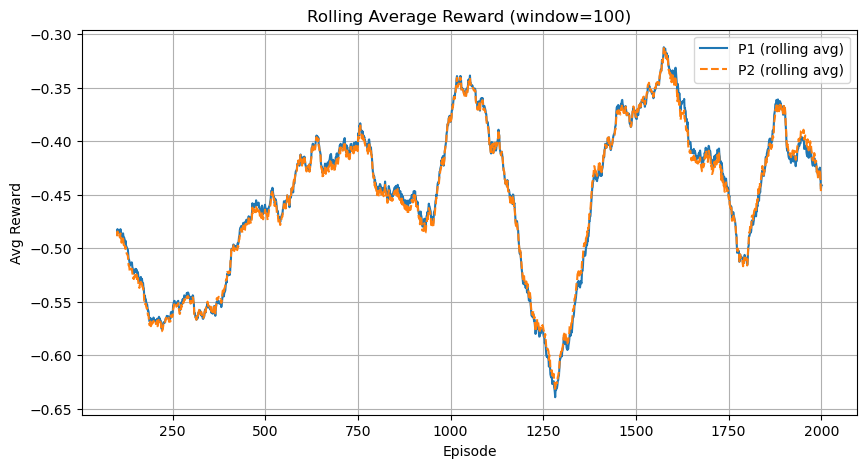

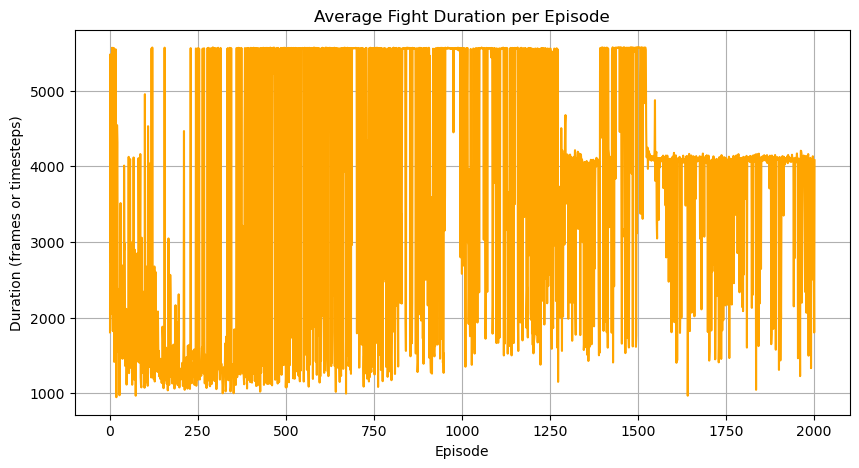

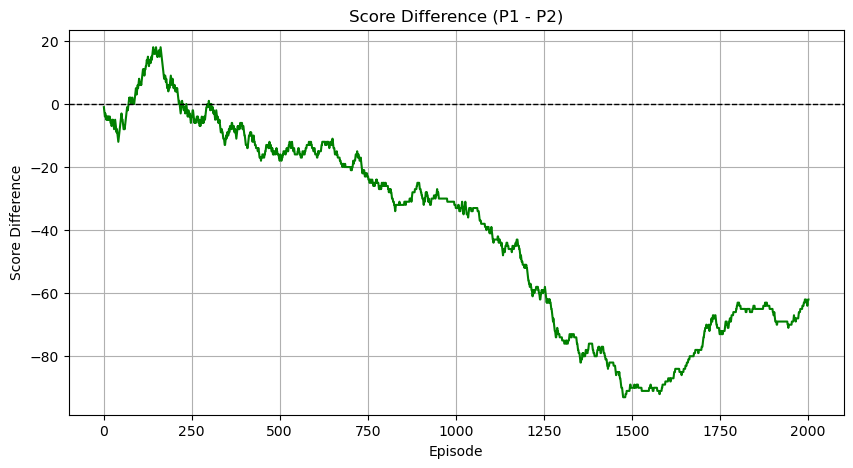

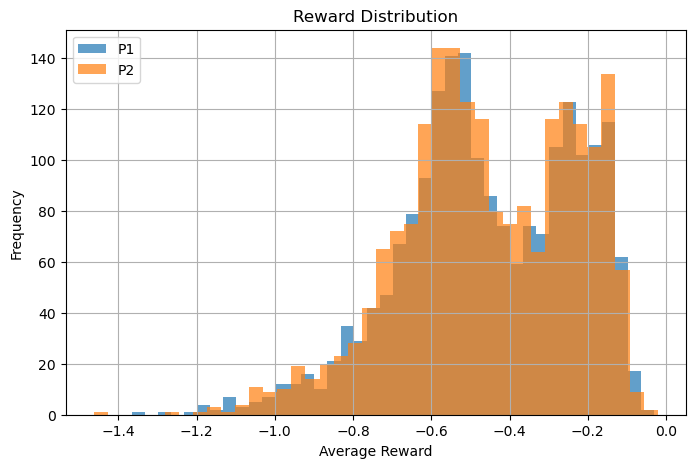

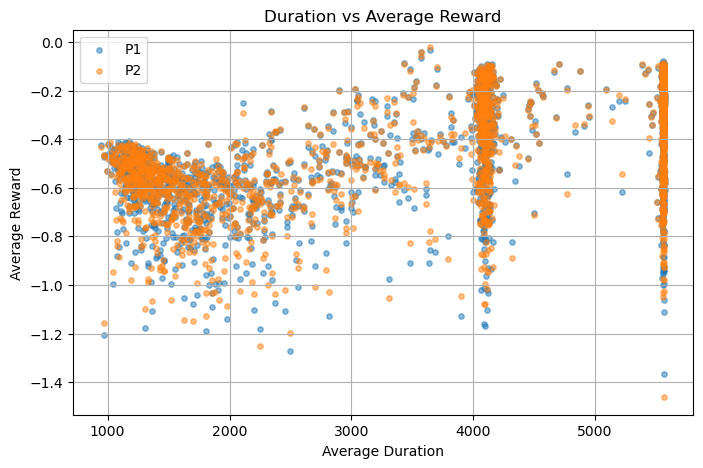

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your log
df = pd.read_csv("logs/phase_2_episodes_20251107_204148.csv")

# Rolling averages (window=100 for smoother trends)
window = 100
df["rolling_reward_p1"] = df["avg_reward_p1"].rolling(window).mean()
df["rolling_reward_p2"] = df["avg_reward_p2"].rolling(window).mean()
df["score_diff"] = df["score_p1"] - df["score_p2"]

# === 1. Rolling average reward ===
plt.figure(figsize=(10,5))
plt.plot(df["episode"], df["rolling_reward_p1"], label="P1 (rolling avg)")
plt.plot(df["episode"], df["rolling_reward_p2"], label="P2 (rolling avg)", linestyle="--")
plt.title("Rolling Average Reward (window=100)")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.legend()
plt.grid(True)
plt.show()

# === 2. Average duration ===
plt.figure(figsize=(10,5))
plt.plot(df["episode"], df["avg_duration"], color="orange")
plt.title("Average Fight Duration per Episode")
plt.xlabel("Episode")
plt.ylabel("Duration (frames or timesteps)")
plt.grid(True)
plt.show()

# === 3. Score difference (P1 - P2) ===
plt.figure(figsize=(10,5))
plt.plot(df["episode"], df["score_diff"], color="green")
plt.title("Score Difference (P1 - P2)")
plt.xlabel("Episode")
plt.ylabel("Score Difference")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.grid(True)
plt.show()

# === 4. Reward distribution ===
plt.figure(figsize=(8,5))
plt.hist(df["avg_reward_p1"], bins=40, alpha=0.7, label="P1")
plt.hist(df["avg_reward_p2"], bins=40, alpha=0.7, label="P2")
plt.title("Reward Distribution")
plt.xlabel("Average Reward")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# === 5. Duration vs Reward correlation ===
plt.figure(figsize=(8,5))
plt.scatter(df["avg_duration"], df["avg_reward_p1"], alpha=0.5, s=15, label="P1")
plt.scatter(df["avg_duration"], df["avg_reward_p2"], alpha=0.5, s=15, label="P2")
plt.title("Duration vs Average Reward")
plt.xlabel("Average Duration")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

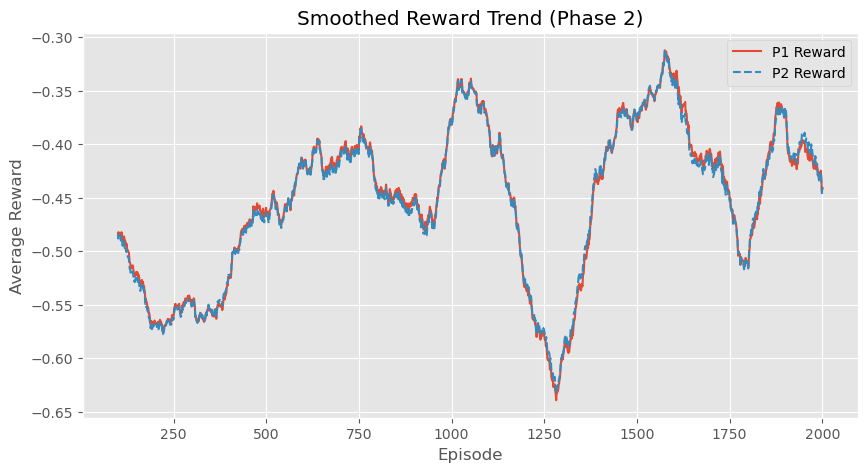

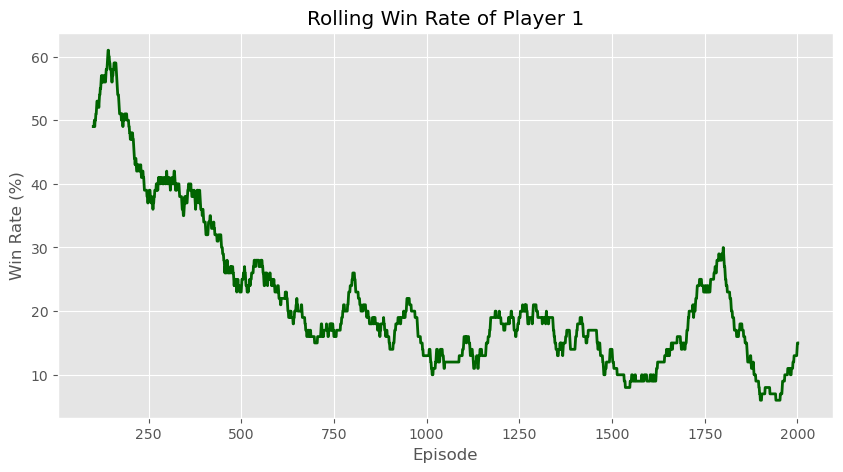

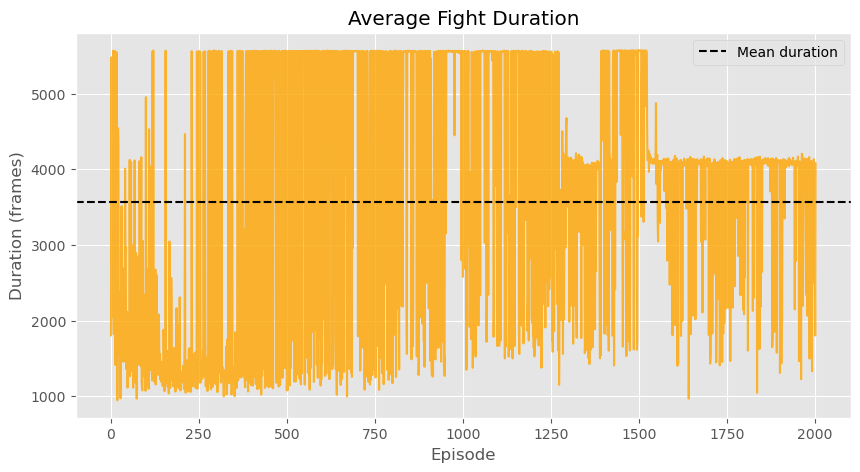

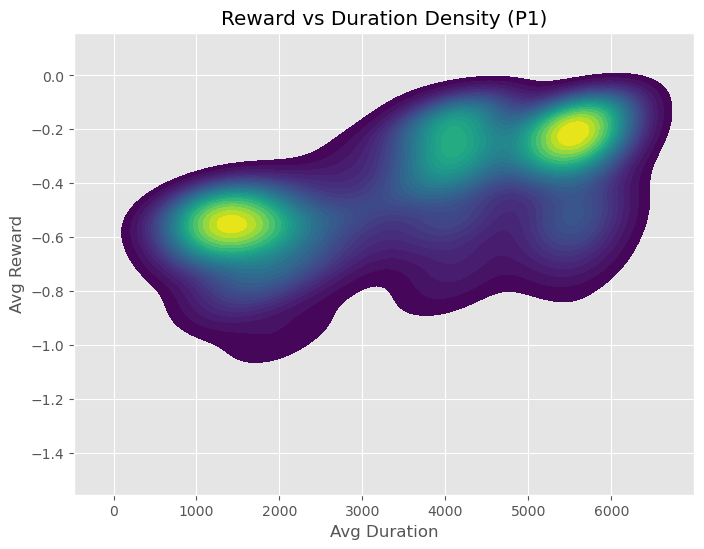

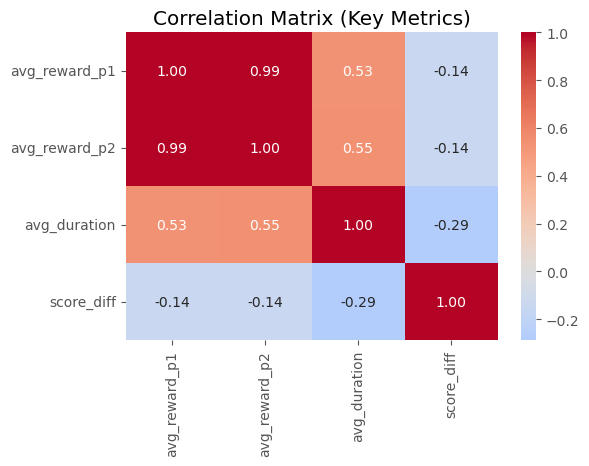

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your log
df = pd.read_csv("logs/phase_2_episodes_20251107_204148.csv")

# Rolling window for smoothing
window = 100
df["rolling_reward_p1"] = df["avg_reward_p1"].rolling(window).mean()
df["rolling_reward_p2"] = df["avg_reward_p2"].rolling(window).mean()
df["score_diff"] = df["score_p1"] - df["score_p2"]
df["rolling_score_diff"] = df["score_diff"].rolling(window).mean()

# Compute win rate for player 1 (increment when score_p1 increases)
df["win_p1"] = df["score_p1"].diff().clip(lower=0)
df["rolling_winrate_p1"] = df["win_p1"].rolling(window).mean() * 100  # percentage

plt.style.use("ggplot")

# === 1. Smoothed reward trends ===
plt.figure(figsize=(10,5))
plt.plot(df["episode"], df["rolling_reward_p1"], label="P1 Reward", linewidth=1.5)
plt.plot(df["episode"], df["rolling_reward_p2"], label="P2 Reward", linewidth=1.5, linestyle="--")
plt.title("Smoothed Reward Trend (Phase 2)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# === 2. Win rate evolution ===
plt.figure(figsize=(10,5))
plt.plot(df["episode"], df["rolling_winrate_p1"], color="darkgreen", linewidth=2)
plt.title("Rolling Win Rate of Player 1")
plt.xlabel("Episode")
plt.ylabel("Win Rate (%)")
plt.grid(True)
plt.show()

# === 3. Fight duration consistency ===
plt.figure(figsize=(10,5))
plt.plot(df["episode"], df["avg_duration"], color="orange", alpha=0.8)
plt.axhline(df["avg_duration"].mean(), color="black", linestyle="--", label="Mean duration")
plt.title("Average Fight Duration")
plt.xlabel("Episode")
plt.ylabel("Duration (frames)")
plt.legend()
plt.grid(True)
plt.show()

# === 4. Reward vs Duration Heatmap ===
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df["avg_duration"],
    y=df["avg_reward_p1"],
    fill=True,
    cmap="viridis",
    thresh=0.05,
    levels=30
)
plt.title("Reward vs Duration Density (P1)")
plt.xlabel("Avg Duration")
plt.ylabel("Avg Reward")
plt.show()

# === 5. Correlation matrix ===
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["avg_reward_p1","avg_reward_p2","avg_duration","score_diff"]].corr(),
    annot=True, cmap="coolwarm", center=0, fmt=".2f"
)
plt.title("Correlation Matrix (Key Metrics)")
plt.show()
